# Creazione screener evoluto su singolo asset

Architettura di un Harami (versione bullish e bearish) senza conferma.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ffn
import datetime

ticker = "BCOM"
startdate = "2007-01-01"
enddate = "2020-11-10"

In [141]:
input_string = ticker + ":Open," + ticker + ":High," + \
               ticker + ":Low," + ticker + ":Close," + ticker + ":Volume"
input_string

'BCOM:Open,BCOM:High,BCOM:Low,BCOM:Close,BCOM:Volume'

In [142]:
dataset =  ffn.get(input_string, start = startdate, end = enddate).apply(lambda x: round(x,2))
dataset.head(10)

,bcomopen,bcomhigh,bcomlow,bcomclose,bcomvolume
Date,,,,,
2007-11-01,11.91,12.26,11.83,12.26,239800.0
2007-11-02,12.33,12.33,11.85,12.00,104600.0
2007-11-05,12.00,12.10,11.75,12.00,130300.0
2007-11-06,12.05,12.15,11.80,12.00,215000.0
2007-11-07,11.85,12.10,11.70,12.00,197000.0
2007-11-08,12.10,12.10,11.06,11.86,230000.0
2007-11-09,11.57,11.85,11.50,11.70,179300.0
2007-11-12,11.80,11.90,11.50,11.53,67200.0
2007-11-13,11.48,11.90,11.25,11.80,192600.0


In [143]:
dataset.columns = ["open","high","low","close","volume"]
dataset.tail(10)

,open,high,low,close,volume
Date,,,,,
2020-10-28,2.33,2.33,2.21,2.21,849.0
2020-10-29,2.28,2.32,2.28,2.32,656.0
2020-10-30,2.32,2.32,2.32,2.32,101.0
2020-11-02,2.20,2.21,2.20,2.21,1905.0
2020-11-03,2.21,2.21,2.21,2.21,340.0
2020-11-04,2.22,2.22,2.18,2.18,1248.0
2020-11-05,2.19,2.23,2.19,2.23,358.0
2020-11-06,2.16,2.16,2.16,2.16,2694.0
2020-11-09,2.18,2.18,2.11,2.12,3336.0


In [144]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

graph_title = ticker + " from " + str(dataset.index[0]) + " to " \
                                + str(dataset.index[-1]) + " - Powered by Gandalf Project R&D"
dataset.head(100).iplot(kind = 'candle', theme = 'white',
                       up_color = 'green', down_color = 'red',
                       title = graph_title, xTitle = "Time", yTitle = "Prices")

In [145]:
dataset["range_perc"] = (dataset.high - dataset.low) / dataset.low * 100
dataset["body_perc"] = abs(dataset.close - dataset.open) / dataset.open * 100
dataset["bodyrange_perc"] = abs(dataset.close - dataset.open) / (dataset.high - dataset.low) * 100
dataset["open_pos"] = (dataset.open - dataset.low) / (dataset.high - dataset.low) * 100
dataset["close_pos"] = (dataset.close - dataset.low) / (dataset.high - dataset.low) * 100
dataset["SMA20"] = dataset.close.rolling(20).mean()
dataset["STD20"] = dataset.close.rolling(20).std()
dataset["BBU"] = dataset.SMA20 + 2 * dataset.STD20
dataset["BBL"] = dataset.SMA20 - 2 * dataset.STD20
dataset.dropna(inplace = True)
dataset.head(10)

,open,high,low,close,volume,range_perc,body_perc,bodyrange_perc,open_pos,close_pos,SMA20,STD20,BBU,BBL
Date,,,,,,,,,,,,,,
2007-11-29,12.18,12.35,11.95,12.35,39800.0,3.347280,1.395731,42.500000,57.500000,100.000000,11.9405,0.204385,12.349271,11.531729
2007-11-30,12.40,12.40,12.14,12.30,31900.0,2.141680,0.806452,38.461538,100.000000,61.538462,11.9425,0.207843,12.358186,11.526814
2007-12-03,12.31,12.40,12.20,12.40,105300.0,1.639344,0.731113,45.000000,55.000000,100.000000,11.9625,0.231559,12.425619,11.499381
2007-12-04,12.35,12.50,11.77,12.20,132500.0,6.202209,1.214575,20.547945,79.452055,58.904110,11.9725,0.237506,12.447512,11.497488
2007-12-05,12.28,12.30,11.75,12.30,16900.0,4.680851,0.162866,3.636364,96.363636,100.000000,11.9875,0.248551,12.484602,11.490398
2007-12-06,12.28,12.49,12.10,12.45,177700.0,3.223140,1.384365,43.589744,46.153846,89.743590,12.0100,0.269248,12.548497,11.471503
2007-12-07,12.19,12.50,11.98,12.50,25900.0,4.340568,2.543068,59.615385,40.384615,100.000000,12.0420,0.287871,12.617741,11.466259
2007-12-10,13.00,13.26,12.98,13.08,145400.0,2.157165,0.615385,28.571429,7.142857,35.714286,12.1110,0.358343,12.827685,11.394315
2007-12-11,13.30,13.47,12.81,13.05,69200.0,5.152225,1.879699,37.878788,74.242424,36.363636,12.1870,0.388548,12.964096,11.409904


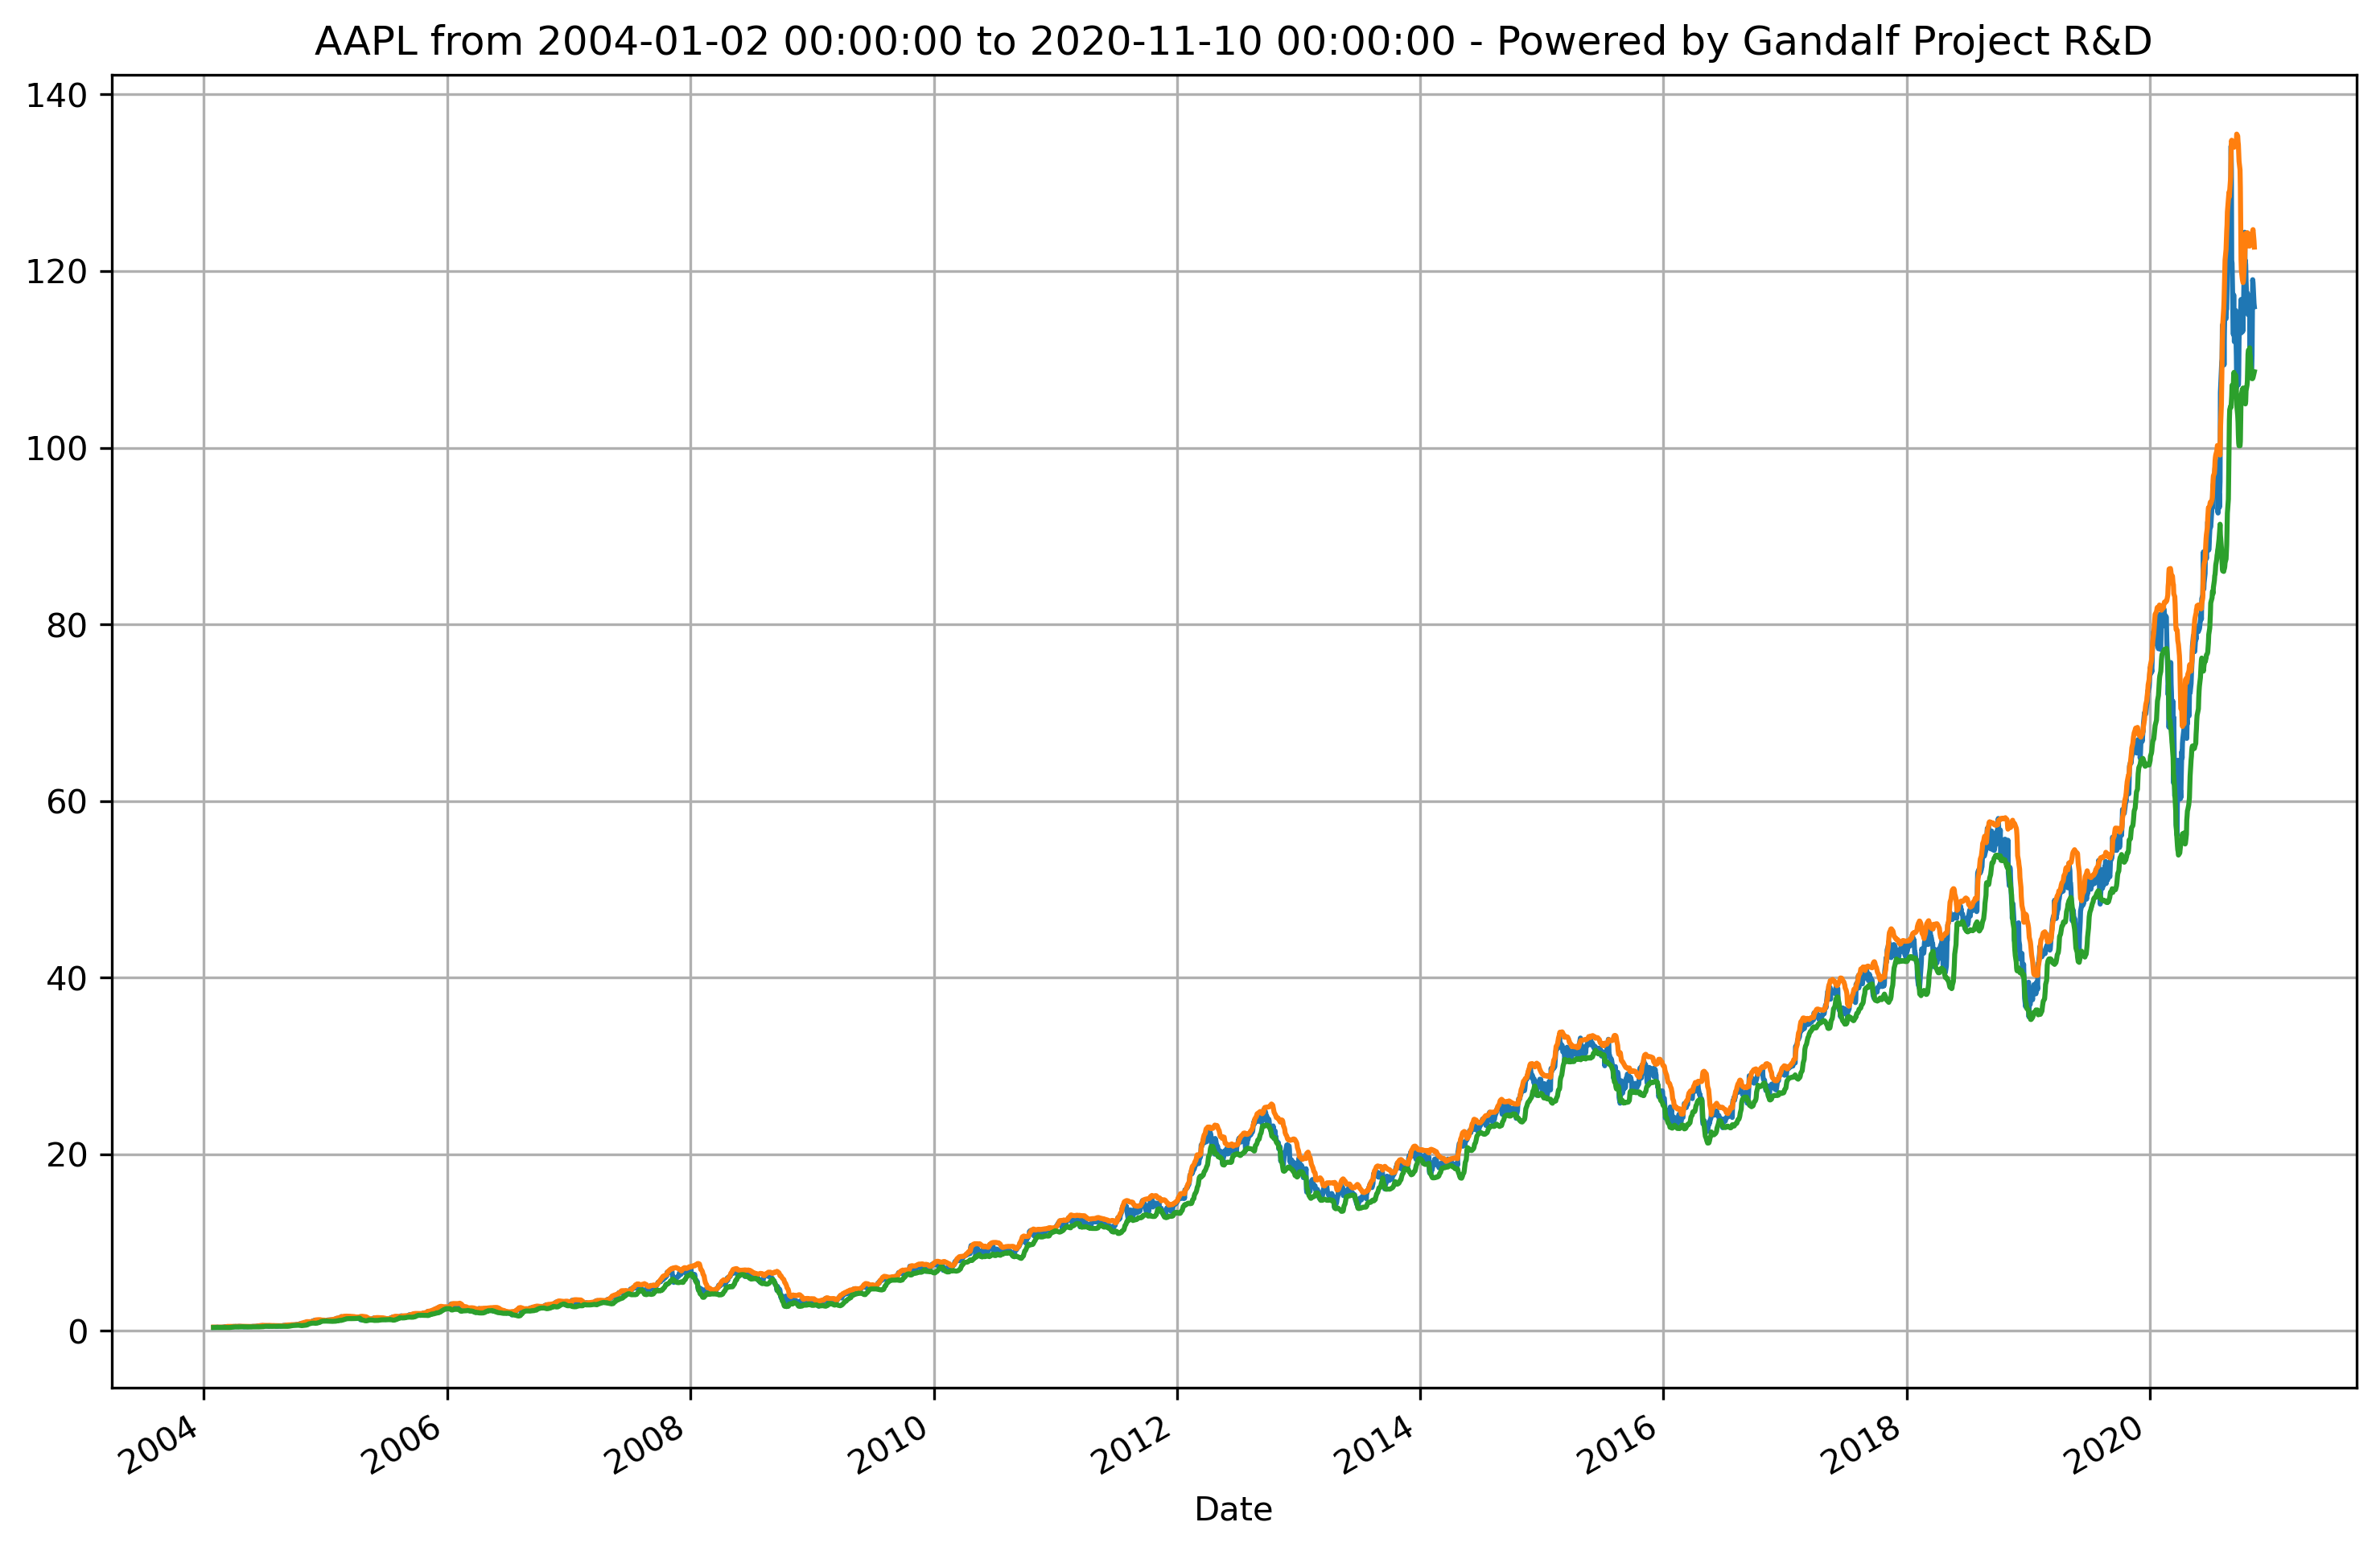

In [133]:
plt.figure(figsize = [12,8], dpi = 300)
plt.title(graph_title)
dataset.close.plot()
dataset.BBU.plot()
dataset.BBL.plot().grid()

# <span style="color:green">Esempio pattern "Bullish Harami"</span>

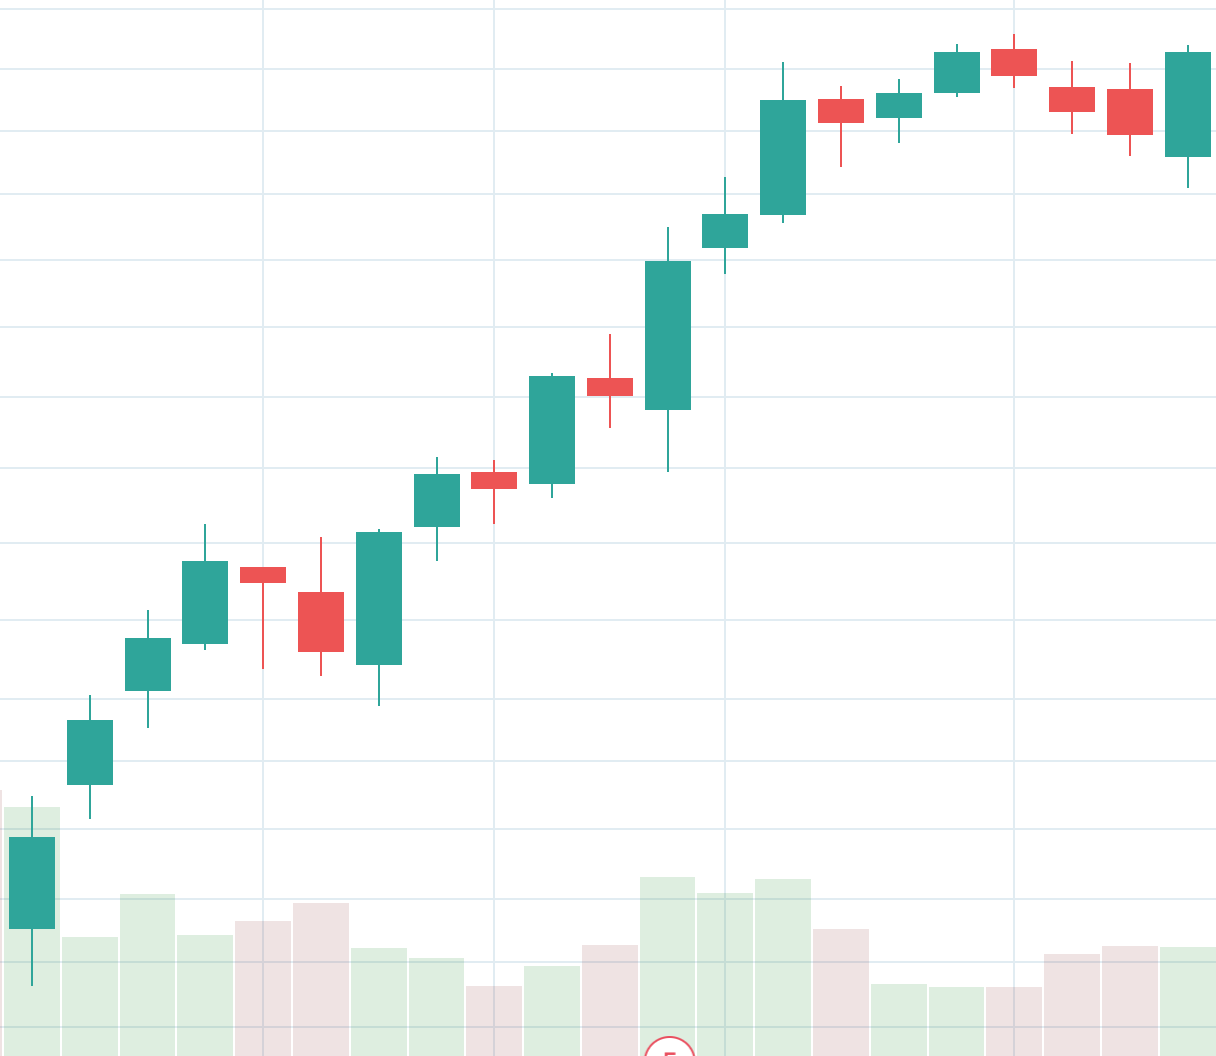

In [134]:
pattern = (dataset.close.shift(1) > dataset.open.shift(1)) & \
          (dataset.high.shift(1) >= dataset.high) & (dataset.low.shift(1) <= dataset.low) & \
          (dataset.close_pos.shift(1) > 70) & (dataset.open_pos.shift(1) < 30) & \
          (dataset.range_perc.shift(1) > 1) & (dataset.bodyrange_perc < 0.5)

Occurrences: 12 

DatetimeIndex(['2004-02-09', '2004-02-12', '2004-03-02', '2004-03-18',
               '2004-03-30', '2004-05-26', '2004-06-03', '2005-05-27',
               '2006-01-31', '2009-01-29', '2011-02-02', '2014-07-24'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 0.06 average of 0.0 with 4 winning trades and 8 loosing trades
After: 2 days: 0.52 average of 0.04 with 5 winning trades and 7 loosing trades
After: 3 days: 0.64 average of 0.05 with 7 winning trades and 5 loosing trades
After: 4 days: 0.47 average of 0.04 with 7 winning trades and 5 loosing trades
After: 5 days: 0.06 average of 0.0 with 6 winning trades and 6 loosing trades
After: 6 days: 0.2 average of 0.02 with 7 winning trades and 5 loosing trades
After: 7 days: 0.15 average of 0.01 with 6 winning trades and 6 loosing trades
After: 8 days: 0.12 average of 0.01 with 6 winning trades and 6 loosing trades
After: 9 days: -0.12 average of -0.01 with 6 winning trades and 6 loosing t

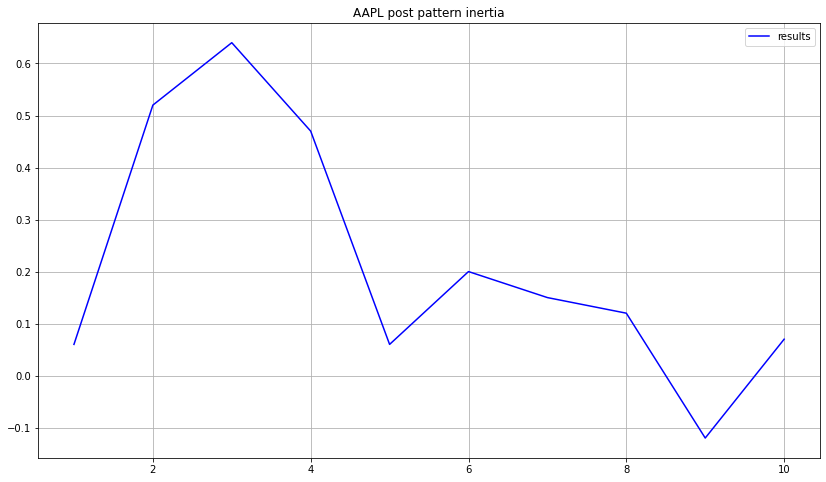

In [135]:
def pattern_stats(dataframe, pattern, direction, delay, ticker):
    """
    Function to calculate pattern stats
    """
    service = dataframe.copy()
    dates = service[pattern == True].index
    occurrences = service[pattern == True].count()[0]
    print("Occurrences:", occurrences, "\n")
    print(dates,"\n")
    results = []
    for i in range(0, delay):
        label = "st" + str(i)
        if direction == "long":
            service[label] = np.where(pattern.shift(1) == True, service.close.shift(-i) - service.open, np.nan)
        else:
            service[label] = np.where(pattern.shift(1) == True, -service.close.shift(-i) + service.open, np.nan)
        profit = round(service[label].sum(),2)
        avg_profit = round(profit / occurrences, 2)
        winning_trades = service[service[label] > 0].count()[0]
        loosing_trades = service[service[label] <= 0].count()[0]
        print("After:", i + 1,  "days:", profit, "average of", avg_profit, "with", winning_trades, "winning trades and", loosing_trades, "loosing trades")
        results.append(profit)
    plotting_results = pd.DataFrame(results, columns = ["results"], 
                                    index = range(1, delay + 1))
    plotting_results.plot(figsize = [14,8], color = "blue").grid()
    plt.title(ticker + " post pattern inertia")
    plt.show()
    return dates, plotting_results

results = pattern_stats(dataset, pattern, "long", 10, ticker)

In [136]:
def plot_patterns(dataframe,results):
    """
    Function that plots every single pattern occurrence
    """
    for date in results:
        single_case = dataframe[(dataframe.index >= (date - pd.Timedelta(days = 3))) & \
                                (dataframe.index <= (date + pd.Timedelta(days = 20)))]    
        graph_title = ticker + " from " + str(single_case.index[0]) + " - Powered by Gandalf Project R&D"

        single_case.iplot(kind = 'candle',theme = 'white',
                          up_color = "green", down_color = "red",
                          title = graph_title, xTitle = "Time", yTitle = "Prices")
    return

plot_patterns(dataset, results[0])

# <span style="color:red">Esempio "Bearish Harami"</span>

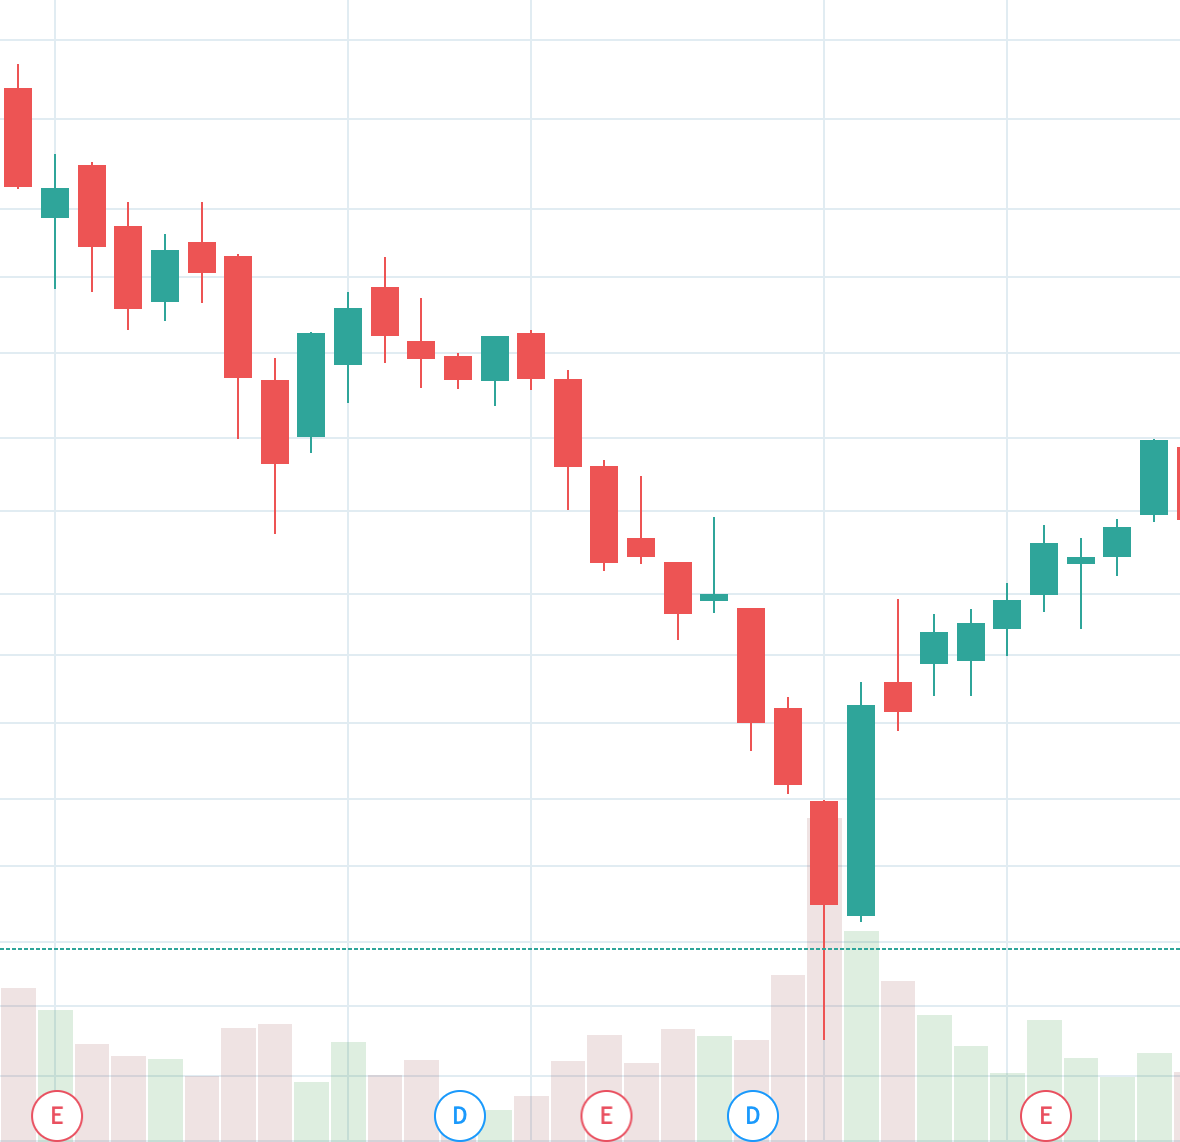

In [137]:
pattern = (dataset.close.shift(1) < dataset.open.shift(1)) & \
          (dataset.high.shift(1) >= dataset.high) & (dataset.low.shift(1) <= dataset.low) & \
          (dataset.close_pos.shift(1) < 30) & (dataset.open_pos.shift(1) > 70) & \
          (dataset.range_perc.shift(1) > 1) & (dataset.bodyrange_perc < 0.5)

Occurrences: 16 

DatetimeIndex(['2004-02-17', '2004-04-01', '2004-05-20', '2004-07-13',
               '2004-07-19', '2004-08-30', '2005-03-04', '2005-04-12',
               '2005-04-29', '2005-06-13', '2005-06-30', '2005-09-02',
               '2006-04-25', '2006-11-02', '2009-06-30', '2013-09-26'],
              dtype='datetime64[ns]', name='Date', freq=None) 

After: 1 days: 0.01 average of 0.0 with 6 winning trades and 10 loosing trades
After: 2 days: 0.27 average of 0.02 with 6 winning trades and 10 loosing trades
After: 3 days: -0.12 average of -0.01 with 4 winning trades and 12 loosing trades
After: 4 days: -0.12 average of -0.01 with 6 winning trades and 10 loosing trades
After: 5 days: -0.19 average of -0.01 with 6 winning trades and 10 loosing trades
After: 6 days: -0.09 average of -0.01 with 4 winning trades and 12 loosing trades
After: 7 days: -0.43 average of -0.03 with 4 winning trades and 12 loosing trades
After: 8 days: -0.29 average of -0.02 with 6 winning trades and 

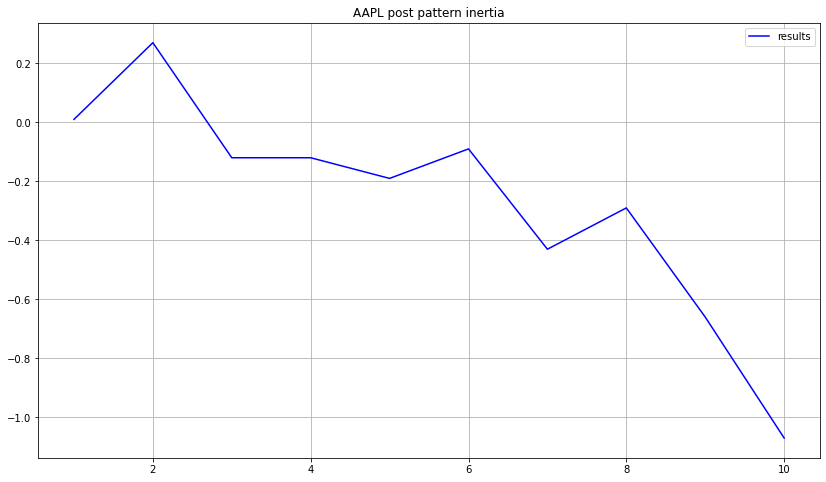

In [138]:
results = pattern_stats(dataset, pattern, "short", 10, ticker)

In [139]:
plot_patterns(dataset, results[0])